In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df['Legendary'] = df['Legendary'].astype(int)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


<AxesSubplot:xlabel='HP', ylabel='Attack'>

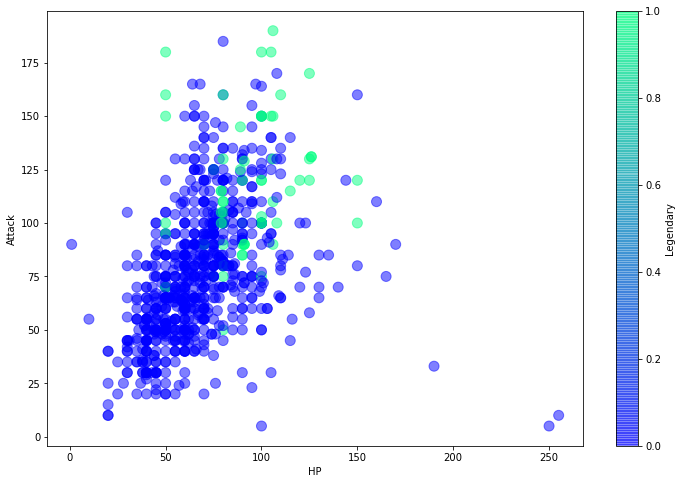

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
df.plot(kind='scatter', x = 'HP',y = 'Attack',s = 100,
c = 'Legendary',cmap='winter',alpha = 0.5,ax = ax)

In [10]:
df.loc[:,'HP':'Speed'].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


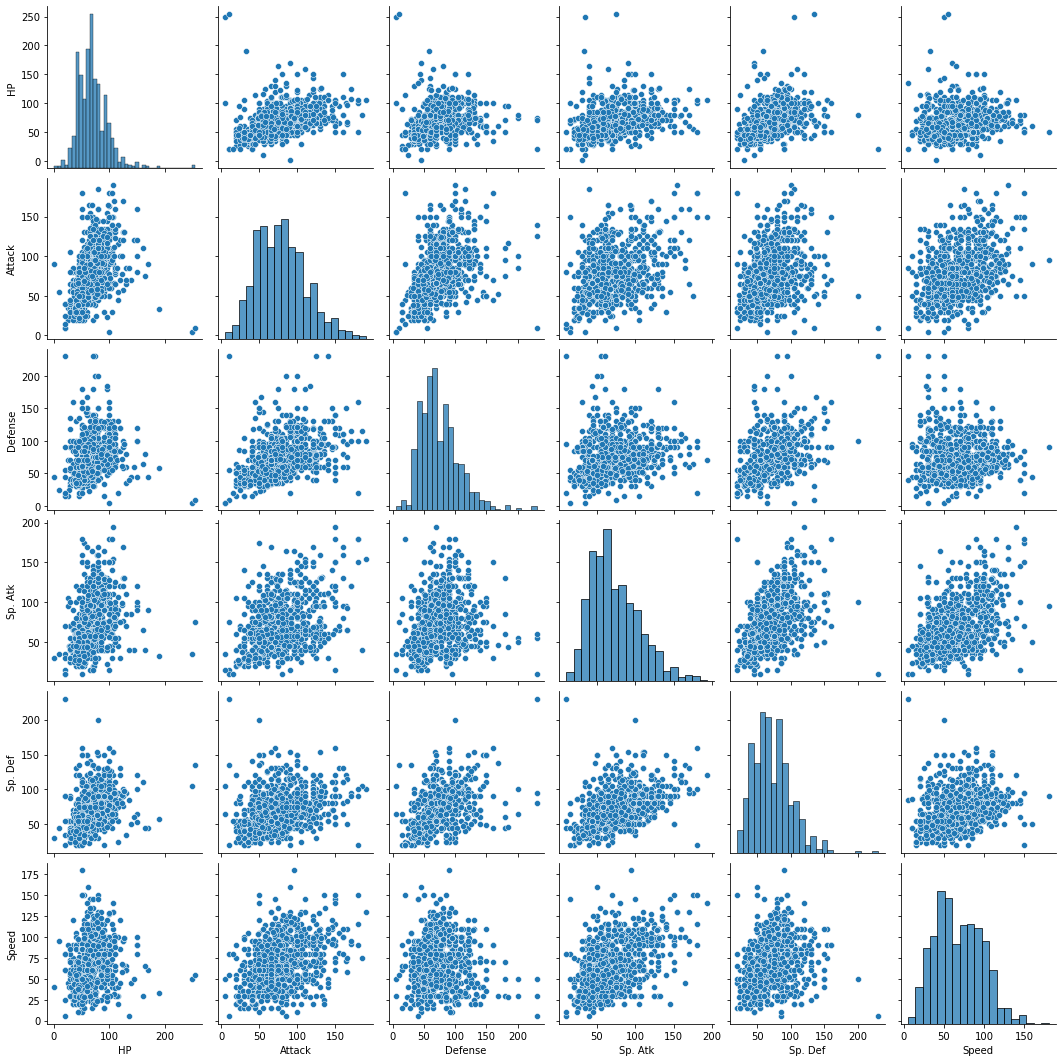

In [11]:
sns.pairplot(df.loc[:,'HP':'Speed'])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA()
x_pca = pca.fit_transform(df.loc[:,'HP':'Speed'])
df_pca = pd.DataFrame(x_pca,columns=['1st','2nd','3rd','4th','5th','6th'])
df_pca.head()

,1st,2nd,3rd,4th,5th,6th
0,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700
1,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004
2,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865
3,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346
4,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302


In [14]:
pca.explained_variance_ratio_#寄与率
#上位３つの変数で寄与率８割を占めているということは図示できる

array([0.46096131, 0.18752145, 0.13584163, 0.09803479, 0.07378238,
       0.04385843])

<function matplotlib.pyplot.show(close=None, block=None)>

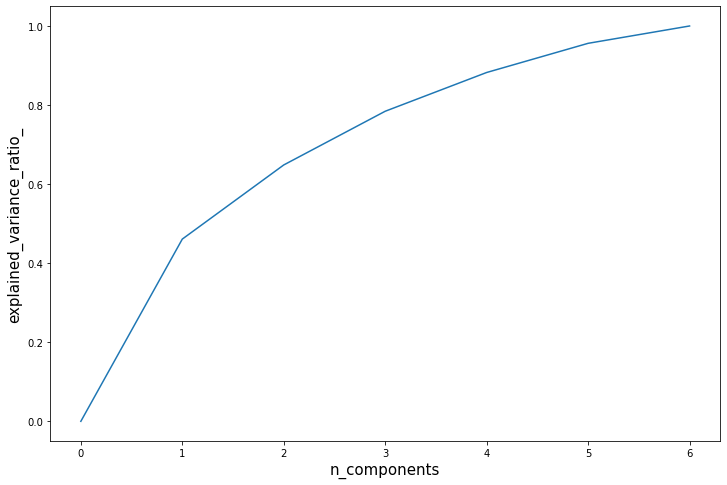

In [18]:
plt.figure(figsize=(12,8))
plt.plot(np.hstack([0,pca.explained_variance_ratio_.cumsum()]))#0から
plt.xlabel('n_components',fontsize=15)
plt.ylabel('explained_variance_ratio_',fontsize=15)
plt.show

In [16]:
pca.explained_variance_ratio_.cumsum()#累積和

array([0.46096131, 0.64848277, 0.7843244 , 0.88235919, 0.95614157,
       1.        ])

In [21]:
pca.components_#主成分負荷量　主成分得点と観測変数との相関係数のこと

array([[ 0.30080785,  0.49289178,  0.38063453,  0.50898063,  0.39436984,
         0.32726262],
       [ 0.04221029,  0.0765448 ,  0.69521578, -0.38331141,  0.17389431,
        -0.57607928],
       [-0.05898335, -0.73043106,  0.04150427,  0.38478597,  0.54078717,
        -0.14407571],
       [ 0.80159275,  0.02736268, -0.36601146,  0.10099765, -0.04170419,
        -0.45912547],
       [ 0.38716678, -0.1932467 , -0.02643827, -0.64085394,  0.37522525,
         0.51046142],
       [-0.33437231,  0.42376414, -0.48518697, -0.15829258,  0.61583212,
        -0.26250137]])

<AxesSubplot:>

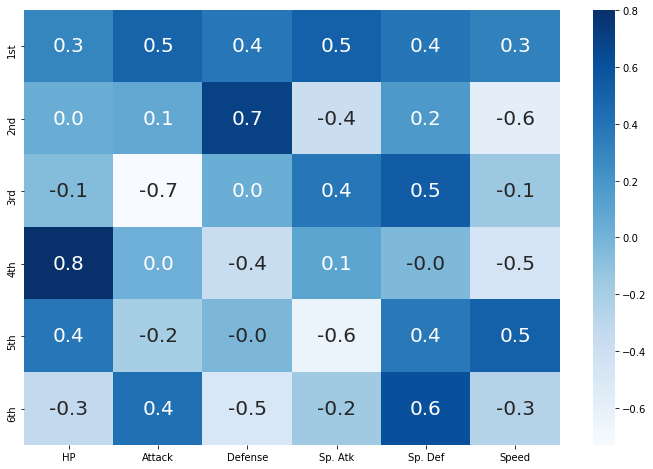

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(pca.components_,
cmap='Blues',
annot=True,annot_kws={'size':20},
fmt = '1.1f',
xticklabels=df.loc[:,'HP':'Speed'].columns,
yticklabels=['1st','2nd','3rd','4th','5th','6th'])

<AxesSubplot:xlabel='1st', ylabel='2nd'>

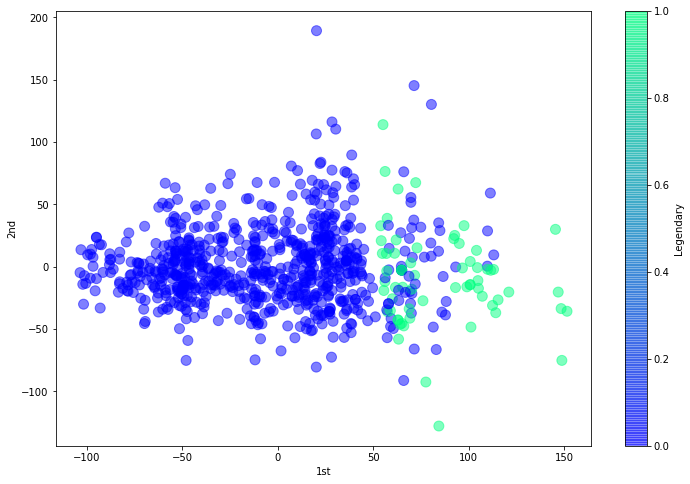

In [26]:
df_pca['Legendary'] = df['Legendary']

fig,ax = plt.subplots(figsize=(12,8))
df_pca.plot(kind='scatter',
x='1st',
y='2nd',
s=100,
c='Legendary',
cmap='winter',
alpha=0.5,
ax=ax)

In [28]:
#特徴量抽出
df1 = pd.read_csv('train.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
df1.shape

(1460, 81)

In [31]:
df1.isnull().sum()[df1.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [32]:
print('before:', df.shape)
df1 = df1.drop(columns=['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])
print('after:',df1.shape)

before: (1460, 81)
after: (1460, 75)


In [33]:
df1.dtypes.value_counts()

object     38
int64      35
float64     2
dtype: int64

In [37]:
all_columns = df1.columns.values
non_cat_cols = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
                "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
                "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
                "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                "ScreenPorch","PoolArea", "MiscVal"]

cat_cols = [col for col in all_columns if col not in non_cat_cols]


In [44]:
nan_cols = df1.isnull().sum()[df1.isnull().sum() > 0].index
for col in nan_cols:
    if col in non_cat_cols:
        df1[col] = df1[col].fillna(df1[col].median())
    else:
        df1[col] = df1[col].fillna(df1[col].mode()[0])
df1 = pd.get_dummies(df1)
df1

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [75]:
X = df1.drop(columns=['Id','SalePrice'])
y = df1['SalePrice']

x = np.log1p(X)
y = np.log1p(y)
X[X == -np.inf] = 0
x.shape


(1460, 269)

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [55]:
pca = PCA()

In [84]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

pca.explained_variance_ratio_.cumsum()

array([0.93803979, 0.95986773, 0.97730689, 0.99111931, 0.99398078,
       0.99583682, 0.99742822, 0.9983771 , 0.99887778, 0.99920318,
       0.99941309, 0.9995587 , 0.99967716, 0.99977567, 0.99985028,
       0.999908  , 0.99994924, 0.999981  , 0.99999185, 0.999999  ,
       0.99999934, 0.99999942, 0.99999947, 0.99999951, 0.99999954,
       0.99999957, 0.9999996 , 0.99999962, 0.99999964, 0.99999966,
       0.99999968, 0.99999969, 0.99999971, 0.99999972, 0.99999974,
       0.99999975, 0.99999976, 0.99999977, 0.99999978, 0.99999979,
       0.9999998 , 0.99999981, 0.99999982, 0.99999983, 0.99999984,
       0.99999985, 0.99999985, 0.99999986, 0.99999987, 0.99999987,
       0.99999988, 0.99999989, 0.99999989, 0.9999999 , 0.9999999 ,
       0.99999991, 0.99999991, 0.99999992, 0.99999992, 0.99999992,
       0.99999993, 0.99999993, 0.99999993, 0.99999994, 0.99999994,
       0.99999994, 0.99999995, 0.99999995, 0.99999995, 0.99999995,
       0.99999996, 0.99999996, 0.99999996, 0.99999996, 0.99999

<function matplotlib.pyplot.show(close=None, block=None)>

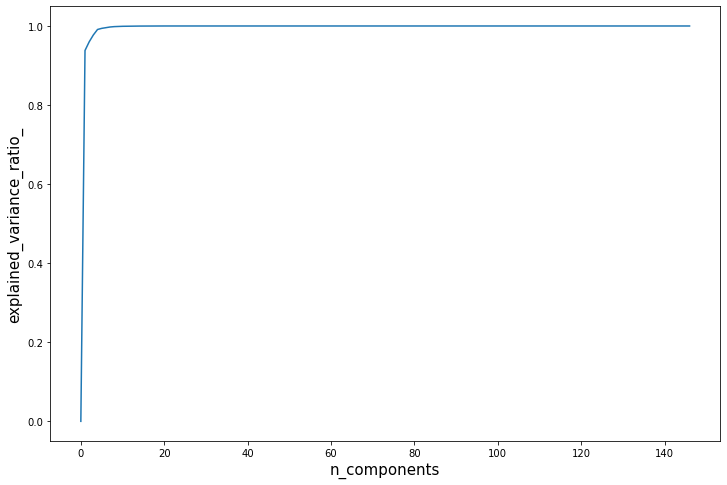

In [60]:
plt.figure(figsize=(12,8))
plt.plot(np.hstack([0,pca.explained_variance_ratio_.cumsum()]))#0から
plt.xlabel('n_components',fontsize=15)
plt.ylabel('explained_variance_ratio_',fontsize=15)
plt.show

In [85]:
X_train_pca = X_train_pca[:,:8]
X_test_pca = X_test_pca[:,:8]

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_absolute_error

In [86]:
%%time

cv = KFold(n_splits=5,shuffle=True,random_state=0)
rf_score = np.sqrt(-cross_val_score(RandomForestRegressor(n_estimators=500,max_depth=6),
                                                X = X_train,
                                                y = y_train,
                                                cv = cv,
                                                scoring = 'neg_mean_squared_error'))
print(rf_score.mean())

0.15633061395848072
CPU times: user 31.3 s, sys: 519 ms, total: 31.8 s
Wall time: 36.2 s


In [87]:
%%time

cv = KFold(n_splits=5,shuffle=True,random_state=0)
rf_score_pca = np.sqrt(-cross_val_score(RandomForestRegressor(n_estimators=500,max_depth=6),
                                                X = X_train_pca,
                                                y = y_train,
                                                cv = cv,
                                                scoring = 'neg_mean_squared_error'))

print(rf_score_pca.mean())

0.20740320210984348
CPU times: user 10.5 s, sys: 190 ms, total: 10.7 s
Wall time: 11.1 s


In [93]:
%%time
from sklearn.model_selection import GridSearchCV

rf_params_grid = {
    'max_depth' : range(5,11)
}

rf_score = np.sqrt(-cross_val_score(GridSearchCV(RandomForestRegressor(n_estimators=500,max_depth=6),
                                                param_grid=rf_params_grid,
                                                cv=cv),
                                                X = X_train_pca,
                                                y = y_train,
                                                cv = cv,
                                                scoring = 'neg_mean_squared_error'))



